In [1]:
# hide
# default_exp model_fitting

from nbdev.showdoc import *

# Model Comparison
We'll extract AIC scores from our subjectwise model fits and plot them against one another in a line plot with corresponding marginal distributions. 

## Baseline

### Murdock Data 
We'll copy over log-likehoods from the relevant notebooks.

In [3]:
# libraries
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

murd_fits = {
    'CMR':[
        1431.4267075699668, 1396.4568088600927, 1147.4295324553746, 1410.7998248955914, 
        1236.7779925507152, 1514.3310664471815, 1125.9791582947662, 1112.3336678272258, 
        1806.6054973034454, 1619.0006744729635, 1099.97072482067, 1216.7252617831628, 
        1469.324493886911, 1638.259094912972, 1059.4091208273853],
    'ICMR Echo': [
        1411.5461829353524, 1390.2512671908662, 1150.4348891752334, 1406.7514779427122, 
        1234.825314726866, 1512.781626639648, 1126.4841970261562, 1117.4822012140378, 
        1781.0346083491966, 1617.7632870331163, 1096.3473934623937, 1216.2287294226223, 
        1470.0271409023958, 1633.620968770836, 1070.8262089553666],
    #'ICMR C->F': [
    #    1413.5871692031506, 1400.0037333787773, 1150.413302212744, 1411.3997791285497, 
    #    1233.6001364872327, 1499.2005704059507, 1128.5318743885166, 1116.7385735435635, 
    #    1781.0920396971246, 1620.1283070706868, 1101.2748700030456, 1215.6977752516805, 
    #    1458.598402589776, 1647.3954716055237, 1030.9011164978156],
    'ICMR Trace': [
        1413.7467244130985, 1399.9857451862629, 1150.4141906075279, 1408.9489084325378, 
        1236.1974167408089, 1515.1319051627647, 1126.4999946660569, 1095.5638298709473, 
        1788.4562090970853, 1620.1359380427357, 1101.5043930368115, 1217.0811820273493, 
        1491.1071237186784, 1653.3927230806403, 1072.8284868515873]
}

murd_df = pd.DataFrame(murd_fits)

In [4]:
# export

def aic(log_likelihood, parameter_count, sample_size):
    return 2 * log_likelihood + (2 * parameter_count) + (
        (2 * parameter_count)*(parameter_count+1))/(sample_size - parameter_count - 1)

def aic_weights(scores):
    best = min(scores)
    deltas = [score - best for score in scores]
    terms = [np.exp(-.5 * delta) for delta in deltas]
    weights = [term/sum(terms) for term in terms]
    return deltas, terms, weights

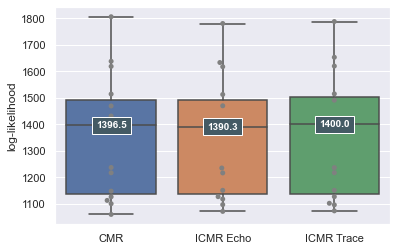

In [8]:
sns.set(style="darkgrid")

ax = sns.boxplot(x='variable', y='value', data=pd.melt(murd_df))
ax = sns.swarmplot(x='variable', y='value', data=pd.melt(murd_df), color="grey")

lines = ax.get_lines()
categories = ax.get_xticks()

for cat in categories:
    # every 4th line at the interval of 6 is median line
    # 0 -> p25 1 -> p75 2 -> lower whisker 3 -> upper whisker 4 -> p50 5 -> upper extreme value
    y = round(lines[4+cat*6].get_ydata()[0],1) 

    ax.text(
        cat, 
        y, 
        f'{y}', 
        ha='center', 
        va='center', 
        fontweight='bold', 
        size=10,
        color='white',
        bbox=dict(facecolor='#445A64'))
    
plt.ylabel('log-likelihood')
plt.xlabel('')
plt.show()

In [4]:
for key in murd_fits:
    print(key)
    print(np.mean(murd_fits[key]))
    print(aic(np.mean(murd_fits[key]), 11, 1600))
    print(np.var(murd_fits[key]))

CMR
1352.3219751272286
2726.8101971058427
49522.33771076556
ICMR Echo
1349.0936995831203
2720.353646017626
46982.495358272245
ICMR C->F
1347.2375414309427
2716.641329713271
48671.69884156527
ICMR All
1352.7329847289925
2727.6322163093705
49205.76035963874


### Okada Data

In [10]:
# libraries
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

murd_fits = {
    'CMR':[297.5449602629021, 244.27865681106456, 336.1941467631634, 
           337.9736726645333, 347.27423245825815, 304.3522491574062, 
           262.50299102240217, 289.2997997209494, 232.9697672095716, 
           358.64382009414555, 184.7663450341519, 318.8257481934555, 
           380.03713872967427, 270.00865939808784, 290.09247000202845, 
           336.82113634424866, 312.20520949311054, 290.7102563710308, 
           395.46388701889566, 395.04781617279355, 310.8428462711054, 
           338.3685597049247, 388.3115788958439, 297.72437675541596, 
           273.1019380621366, 371.9867789818122, 327.6887122330527, 
           291.946344874964, 348.4191026098891, 302.3530027028615, 
           347.5938865051015, 309.8776333858249, 336.80662658082076, 
           386.73848147630076, 314.8512212055618, 387.3090042203206, 
           299.0963052579905, 297.7244112968297, 237.85429982056422, 
           233.3334842451797, 212.9926852817866, 270.81256558818916, 
           299.9471356314759, 252.01763332568177, 297.20772602556264, 
           303.1243577018423, 203.49661125114864, 250.53915718548024, 
           223.46817443689832, 250.54360923163125, 156.85155116172984, 
           262.873650797028, 294.3210317060235, 269.647534895781, 
           315.9453754631813, 256.6385364088046, 237.87299516872213, 
           313.85661904679705, 320.314958120371, 291.80778087924506, 
           376.37601313216675, 309.7365934500121, 335.48170697091007, 
           377.3848929657191, 275.4241270974401, 246.37074926874152, 
           321.63947266589423, 239.27802481696793, 226.76765639676495, 
           382.1044440228179, 220.55452400431392, 349.378770393507],
    'ICMR Echo': [305.43085244072836, 238.4647612876656, 329.7025438222279, 336.5242386434903, 348.8882686781923, 303.42052253046273, 257.79028369266376, 287.33568888388504, 231.5204119234239, 357.9344643456218, 181.46051462826142, 319.2786048533236, 387.2531095508502, 269.0830523858128, 293.68963754785653, 334.134695434706, 311.4475440313631, 286.31020238280615, 392.3681016126193, 388.76368100082846, 312.07737509858094, 338.5737868324603, 386.6888610035053, 296.756423054792, 279.7936469713827, 368.5862158821502, 326.02345412972596, 301.3053804139643, 352.71522416157325, 300.5193583950445, 345.4385425182849, 314.78466786099267, 337.051265773251, 386.80861154544766, 312.53360235750336, 382.7372029917884, 300.25468402102683, 331.88057107673205, 239.3717635475779, 234.59159663502876, 208.90610483821902, 272.748917448056, 299.5506347407328, 251.70012354914184, 299.9428794651608, 303.591324441701, 202.14077078708183, 252.26015733005568, 231.4045925400315, 244.99261362739793, 158.86384462279366, 265.6360760500071, 295.6774717704563, 271.3159845017648, 317.015546070287, 256.7223721900952, 236.65727344008144, 312.5991561453391, 321.10486502304803, 292.79972104872263, 375.20322712418846, 310.83077765103815, 342.2889371448859, 376.9418863675112, 274.85991592271597, 247.7264643747331, 323.5853565790591, 239.8117182087459, 224.61083959985154, 382.1068713103373, 221.2835364110936, 350.6758479167143],
    #'ICMR C->F': [303.45382418296583, 238.46282645585563, 329.21125249576926, 340.7811041048678, 345.48765769374484, 303.4005617040675, 258.9310252929649, 293.6882226107346, 231.76563732130222, 357.2523991288455, 186.88632375120378, 310.7775820517285, 385.6292758439509, 267.72592564163585, 289.7996584598312, 335.71608798603484, 313.5755924368575, 287.78938575643326, 392.34110369539655, 389.0535098766269, 312.2944074541688, 338.47667227049374, 385.4692131137648, 329.40473609017414, 279.3650104503786, 396.54517272072485, 325.1072920219178, 300.1444907600177, 349.13551822802333, 302.69592407597906, 348.4221946075333, 314.3195986602027, 332.8070501018908, 387.4473068963529, 314.3556297660127, 388.9666145840851, 302.0310839211129, 296.3751514858682, 250.39132722569826, 235.09901213306063, 209.36347314106723, 273.43650907202255, 299.49463007237176, 242.19554109177446, 300.95226972774515, 304.385604442194, 204.5953051690568, 251.57100617324565, 225.2613241648569, 244.7351475213051, 156.74130963480394, 263.79598323823905, 290.77155673782096, 272.1204934982495, 317.6837307266545, 256.2953983547324, 237.1057294872423, 328.6160210288548, 321.0671196644732, 293.9167406181948, 376.3267867870279, 311.38479285018485, 335.99187062967457, 379.05301668022867, 275.7292619985391, 248.27591681151452, 318.21591307589074, 239.83323791949584, 229.2030226161997, 381.0622664539487, 221.53013582469154, 350.3184631033009],
    'ICMR Trace': [304.1492837962723, 238.11938882939262, 330.5131663115768, 336.44728224544065, 349.41726842994876, 312.53146827722725, 337.51448609531076, 287.6268395087693, 231.74552953964962, 356.2829576346587, 186.78852327955062, 313.85632714317353, 386.2456067817088, 269.5281002338953, 306.9576985773913, 335.0796941644478, 313.2325072733741, 288.0938532170716, 392.4344716236275, 388.6550631459827, 312.3326970774226, 336.4992709984682, 392.0633484007093, 298.40465317858525, 279.2788397153214, 368.1967652856482, 326.2291789312814, 298.4745408323163, 349.7436228875689, 303.3196349165347, 340.49153080235385, 314.3771787970444, 335.6554958231367, 386.8993263462754, 313.1052282183267, 388.86259281718344, 300.9041230910331, 295.9761497154199, 240.47232125122736, 235.66718416776428, 211.8685111229628, 273.454854192118, 299.5132143239589, 242.18937193990186, 299.0722564209308, 304.3281147425448, 204.29845720336655, 252.55098800130543, 225.28925966764953, 244.61241061828278, 150.7567967260189, 258.8903340058245, 298.712680970008, 267.86976573312046, 317.6805364056973, 256.4124533154694, 237.26547514342954, 312.9963713094586, 314.20033678076226, 291.9739160538204, 374.1112263554562, 311.5447186134352, 335.12520479991304, 377.7388535084909, 275.9007825338142, 248.30358055491138, 317.88051931337884, 239.77112370752752, 216.09565314736398, 388.8443199194015, 221.54367214471227, 349.70935342891005]
}

murd_df = pd.DataFrame(murd_fits)

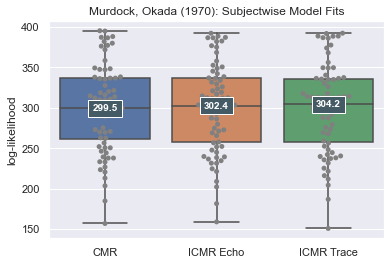

In [12]:
sns.set(style="darkgrid")

ax = sns.boxplot(x='variable', y='value', data=pd.melt(murd_df))
ax = sns.swarmplot(x='variable', y='value', data=pd.melt(murd_df), color="grey")

lines = ax.get_lines()
categories = ax.get_xticks()

for cat in categories:
    # every 4th line at the interval of 6 is median line
    # 0 -> p25 1 -> p75 2 -> lower whisker 3 -> upper whisker 4 -> p50 5 -> upper extreme value
    y = round(lines[4+cat*6].get_ydata()[0],1) 

    ax.text(
        cat, 
        y, 
        f'{y}', 
        ha='center', 
        va='center', 
        fontweight='bold', 
        size=10,
        color='white',
        bbox=dict(facecolor='#445A64'))
    
plt.title('Murdock, Okada (1970): Subjectwise Model Fits')
plt.xlabel('')
plt.ylabel('log-likelihood')
plt.show()

In [33]:
for key in murd_fits:
    print(key)
    print(np.mean(murd_fits[key]))
    print(aic(np.mean(murd_fits[key]), 11, 400))
    print(np.var(murd_fits[key]))

CMR
299.05164197918066
620.7836963294953
2862.7292683577957
ICMR Echo
299.65068364150903
621.9817796541521
2863.8091862474093
ICMR C->F
300.16127696352606
623.0029662981862
2912.8850785592763
ICMR All
300.037198778695
622.754809928524
2906.378419837105


## Repetitions

### Condition 0

In [1]:
# libraries
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

murd_fits = {
    'CMR': [689.990524765121, 409.7473091903199, 689.4024016084406, 280.5030145868335, 667.0282861715486, 636.3173461186016, 322.3540128784967, 599.4954865135444, 467.9340636706372, 840.0134615261937, 685.0819137715099, 753.2072095123577, 893.6001939055192, 477.62680950739855, 575.8237649783773, 542.5270995864483, 554.5596218051656, 529.66084416342, 367.22771868341954, 560.6598417824923, 382.895859000882, 355.5777352037621, 412.90148928271344, 601.1169491129708, 352.62436167501426, 296.33803838536795, 468.0270579776737, 372.5171198058004, 425.3824466186752, 634.1224133788589, 453.59482231482053, 501.6664049156485, 624.7246234571859, 471.7789391572379, 253.9136636039232],
    'ICMR Echo': [693.3921768285054, 428.31038418789103, 684.1852817602553, 282.63866334033287, 675.1434727090693, 640.3714290802552, 361.3477069862777, 632.8131496189351, 469.33752222121643, 856.9930456046253, 697.0591772007538, 757.7314163778582, 901.3601984694435, 477.35372604958354, 592.6603713369507, 549.0552229926119, 563.9503238803466, 662.9535648660379, 372.12250911507846, 553.5103175028943, 383.8253614450187, 354.6006339462832, 415.13199450871366, 596.1559828866509, 353.3591937390927, 297.597696288076, 470.25727708673287, 376.2809783128548, 425.89701783194704, 674.1398143178692, 464.2921702517434, 499.4279271427627, 626.8441809014032, 478.32131831868355, 255.56859536168943],
    'ICMR Trace': [693.135320121328, 410.9502976798403, 684.0804288397655, 282.79792287363995, 663.9841161419498, 643.5627814425951, 317.8846985704147, 602.5095088253629, 467.89764790714065, 854.5221824923692, 697.094984057409, 762.5853331223753, 897.7687527722544, 474.1906966116537, 592.7864938430134, 543.1385077953325, 560.5400623031758, 526.5292823123668, 365.01207306623803, 553.5023573286135, 383.79370691293485, 354.12761530313776, 414.1743783515741, 681.0503360137704, 387.70240183658143, 295.95664556391836, 478.098751936848, 372.32930354718843, 426.45146352136874, 644.5007219828669, 449.2862905205447, 508.42115485461784, 626.1830950425514, 471.8726293542652, 254.6456220774341]
}

murd_df = pd.DataFrame(murd_fits)

In [2]:
# export

def aic(log_likelihood, parameter_count, sample_size):
    return 2 * log_likelihood + (2 * parameter_count) + (
        (2 * parameter_count)*(parameter_count+1))/(sample_size - parameter_count - 1)

def aic_weights(scores):
    best = min(scores)
    deltas = [score - best for score in scores]
    terms = [np.exp(-.5 * delta) for delta in deltas]
    weights = [term/sum(terms) for term in terms]
    return deltas, terms, weights

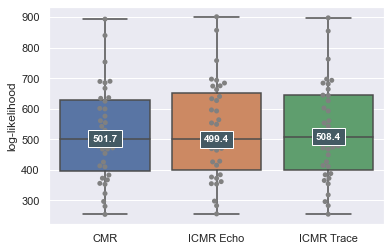

In [3]:
sns.set(style="darkgrid")

ax = sns.boxplot(x='variable', y='value', data=pd.melt(murd_df))
ax = sns.swarmplot(x='variable', y='value', data=pd.melt(murd_df), color="grey")

lines = ax.get_lines()
categories = ax.get_xticks()

for cat in categories:
    # every 4th line at the interval of 6 is median line
    # 0 -> p25 1 -> p75 2 -> lower whisker 3 -> upper whisker 4 -> p50 5 -> upper extreme value
    y = round(lines[4+cat*6].get_ydata()[0],1) 

    ax.text(
        cat, 
        y, 
        f'{y}', 
        ha='center', 
        va='center', 
        fontweight='bold', 
        size=10,
        color='white',
        bbox=dict(facecolor='#445A64'))
    
plt.ylabel('log-likelihood')
plt.xlabel('')
plt.show()

In [4]:
for key in murd_fits:
    print(key)
    print(np.mean(murd_fits[key]))
    print(aic(np.mean(murd_fits[key]), 11, 1600))
    print(np.var(murd_fits[key]))

CMR
518.5697956747538
1059.305838200893
24079.761995524783
ICMR Echo
529.2568514990983
1080.679949849582
25149.60163683074
ICMR Trace
524.087644712184
1070.3415362757535
25093.750967999036


### Condition 1

In [5]:
# libraries
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

murd_fits = {
    'CMR': [1153.8934664606459, 999.7751927641987, 1453.2074955230128, 805.0391820398788, 1368.5833543392562, 1423.8220801204175, 670.2306022466016, 1379.4465876511285, 1042.7245311099537, 1630.8501719382803, 1189.0413105155094, 1392.046127957334, 1839.0860203765892, 1125.585970489818, 1366.042154427499, 1164.6474760657363, 1134.1537009228991, 1163.3078474413637, 920.7729049301579, 1485.6842793437586, 782.2267985685977, 1014.4369767818444, 1019.0441376348456, 1220.391545397636, 704.7165864921367, 785.0180196821505, 1159.9418769336353, 865.2873201517932, 942.4656909356411, 1390.292261292917, 1128.9237910354077, 1233.4835714363464, 1276.3180302096043, 1111.760602490497, 597.2928384772823],
    'ICMR Echo':[1171.0527248132898, 991.1662858564413, 1451.812047995352, 800.5280561985785, 1370.999392271428, 1422.0373965673107, 666.6343719174229, 1376.0037784916651, 1053.6481814607264, 1618.1915366399103, 1194.8169155572218, 1381.5501170471073, 1851.2440779087597, 1473.470093400948, 1360.258679523251, 1176.4321718627684, 1134.161086069797, 1164.1818786025904, 930.2790160710359, 1476.4454913787613, 787.8388660908189, 1065.0014106890083, 1011.0483009425752, 1206.0649252083572, 705.3801488785483, 784.5521685331162, 1156.3572265169792, 869.1916993795821, 939.1889667538851, 1388.9427818177173, 1126.146729296832, 1225.8997068109202, 1270.1771270622037, 1110.9606122502428, 590.1100716831975],
    'ICMR Trace': [1164.8277141014453, 991.6407758241348, 1439.6412759979503, 797.6881241193153, 1380.259761039194, 1423.2750649544555, 669.4890094237355, 1378.450725879476, 1053.6751436431566, 1622.0247330279296, 1189.1113967264284, 1386.6203667641355, 1843.184272997998, 1120.691055718642, 1362.7220459696832, 1160.4320994033465, 1139.170385260959, 1170.4504660985613, 925.6339246822151, 1477.912881837564, 786.9714435527281, 1008.5414132648503, 1012.6525474727189, 1214.582128879074, 707.8290035591731, 787.7518932360216, 1146.5893798049137, 864.4706542782872, 939.1690095621996, 1387.4506160965866, 1191.8294543705156, 1240.7946858687874, 1269.8520061513857, 1111.74197767212, 589.0600594501518]
}

murd_df = pd.DataFrame(murd_fits)

In [6]:
# export

def aic(log_likelihood, parameter_count, sample_size):
    return 2 * log_likelihood + (2 * parameter_count) + (
        (2 * parameter_count)*(parameter_count+1))/(sample_size - parameter_count - 1)

def aic_weights(scores):
    best = min(scores)
    deltas = [score - best for score in scores]
    terms = [np.exp(-.5 * delta) for delta in deltas]
    weights = [term/sum(terms) for term in terms]
    return deltas, terms, weights

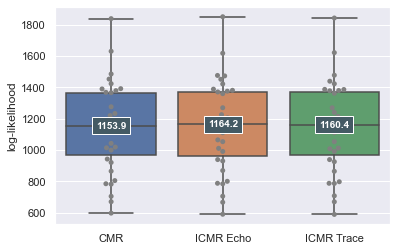

In [7]:
sns.set(style="darkgrid")

ax = sns.boxplot(x='variable', y='value', data=pd.melt(murd_df))
ax = sns.swarmplot(x='variable', y='value', data=pd.melt(murd_df), color="grey")

lines = ax.get_lines()
categories = ax.get_xticks()

for cat in categories:
    # every 4th line at the interval of 6 is median line
    # 0 -> p25 1 -> p75 2 -> lower whisker 3 -> upper whisker 4 -> p50 5 -> upper extreme value
    y = round(lines[4+cat*6].get_ydata()[0],1) 

    ax.text(
        cat, 
        y, 
        f'{y}', 
        ha='center', 
        va='center', 
        fontweight='bold', 
        size=10,
        color='white',
        bbox=dict(facecolor='#445A64'))
    
plt.ylabel('log-likelihood')
plt.xlabel('')
plt.show()

In [8]:
for key in murd_fits:
    print(key)
    print(np.mean(murd_fits[key]))
    print(aic(np.mean(murd_fits[key]), 11, 1600))
    print(np.var(murd_fits[key]))

CMR
1141.1297286909821
2304.4257042333497
75619.33271501541
ICMR Echo
1151.4792583299532
2325.124763511292
78152.81491485065
ICMR Trace
1141.6053570482811
2305.3769609479477
75450.7700275717


### Condition 2

In [9]:
# libraries
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

murd_fits = {
    'CMR': [1892.72638766538, 1438.734644603953, 2138.81364439326, 1087.073619200475, 2049.446158177838, 2078.4502901849846, 1001.1647426208801, 1984.8761245443334, 1535.9240600296957, 2486.51996387309, 1901.5172697584176, 2149.188063596266, 2754.790959742164, 1614.409780660561, 1934.6920626726962, 1731.5535015827536, 1718.7940052445826, 1705.7662896404113, 1295.195466438427, 2052.485730803137, 1175.6069087762335, 1380.4097689835598, 1447.712038998764, 1840.2470667354335, 1089.6475030292388, 1088.1723632904823, 1645.4964138079254, 1245.7238850071174, 1380.2998065955426, 2040.4236929030667, 1581.041924773864, 1737.9138224306835, 1912.4644759347555, 1598.4718059319935, 859.2117746144723],
    'ICMR Echo':[2490.0093107515495, 1413.4366928835639, 2163.460624149504, 1083.216136004795, 2048.8234406041347, 2073.35877195745, 1078.3976871175169, 1985.941412883431, 1532.8663320971473, 2607.757068397478, 1908.8708539649037, 2158.7486488327904, 2747.6461176819703, 1636.8996078303605, 2036.696370819221, 1729.417499200791, 1711.4845827288605, 1714.4065749347237, 1360.3347367484198, 2051.2097793615203, 1240.2124829703666, 1366.5331424831627, 1435.6261649097244, 1824.6827983553505, 1091.160565288609, 1092.2910791397107, 1643.0618881569615, 1243.3437903558736, 1372.7579321011629, 2041.0329605456002, 1602.944938131328, 1731.6927774344822, 1907.825838842364, 1594.1740417768162, 846.821922130709],
    'ICMR Trace': [1885.4435131911107, 1447.4610244898363, 2336.7290032970586, 1083.2591090660117, 2049.1180167393286, 2065.64972698386, 1050.036260726569, 1981.2136169741416, 1532.341366885666, 2476.605142075588, 1936.4981530184477, 2150.1535468808024, 2752.459215174692, 1608.60055518367, 1936.8492465192728, 1717.3064873316825, 1701.0777225975955, 1713.760127562669, 1299.9131442458895, 2051.666751600185, 1177.1505691253847, 1367.035696920983, 1465.9725482522986, 1805.7136211641873, 1088.6805606977164, 1089.695550692002, 2061.332028106287, 1248.074643273153, 1372.9794703327132, 2039.5115975433246, 1644.4015782182003, 1751.420593318261, 1928.1180479489267, 1596.5728786618013, 853.265896416244]
}

murd_df = pd.DataFrame(murd_fits)

In [10]:
# export

def aic(log_likelihood, parameter_count, sample_size):
    return 2 * log_likelihood + (2 * parameter_count) + (
        (2 * parameter_count)*(parameter_count+1))/(sample_size - parameter_count - 1)

def aic_weights(scores):
    best = min(scores)
    deltas = [score - best for score in scores]
    terms = [np.exp(-.5 * delta) for delta in deltas]
    weights = [term/sum(terms) for term in terms]
    return deltas, terms, weights

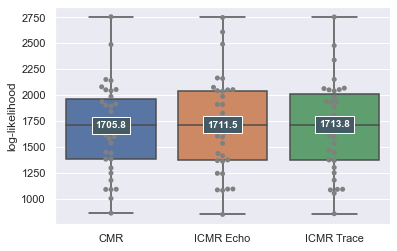

In [11]:
sns.set(style="darkgrid")

ax = sns.boxplot(x='variable', y='value', data=pd.melt(murd_df))
ax = sns.swarmplot(x='variable', y='value', data=pd.melt(murd_df), color="grey")

lines = ax.get_lines()
categories = ax.get_xticks()

for cat in categories:
    # every 4th line at the interval of 6 is median line
    # 0 -> p25 1 -> p75 2 -> lower whisker 3 -> upper whisker 4 -> p50 5 -> upper extreme value
    y = round(lines[4+cat*6].get_ydata()[0],1) 

    ax.text(
        cat, 
        y, 
        f'{y}', 
        ha='center', 
        va='center', 
        fontweight='bold', 
        size=10,
        color='white',
        bbox=dict(facecolor='#445A64'))
    
plt.ylabel('log-likelihood')
plt.xlabel('')
plt.show()

In [12]:
for key in murd_fits:
    print(key)
    print(np.mean(murd_fits[key]))
    print(aic(np.mean(murd_fits[key]), 11, 1600))
    print(np.var(murd_fits[key]))

CMR
1673.5704576356125
3369.3071621226104
178547.31842167917
ICMR Echo
1701.9184163306388
3426.003079512663
199067.20072226884
ICMR Trace
1693.3162003204445
3408.7986474922745
186413.08765128412
